$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 2 $$

# `01` Assignment 04
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

**Notes:**
- Split the data into train and test (test size: 20%) split and use validation during training.
- Evaluate the model on training and test sets.
- Plot the loss, and accuracy against epochs.



Sample Plot:


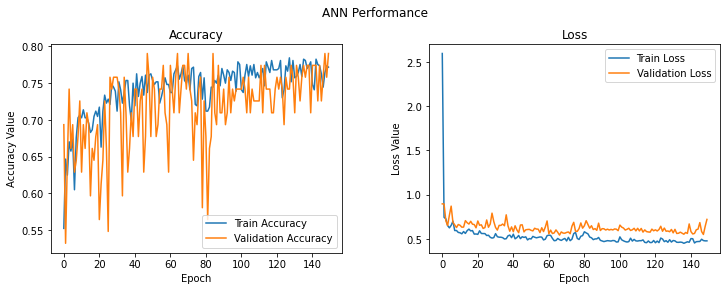

## `0` Import Libraries & Load Dataset

In [3]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
np.random.seed = 42

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping

In [4]:
dataset = pd.read_csv('diabetes.csv')

In [5]:
df= pd.DataFrame(dataset.copy())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## `i` Shallow network


In [8]:
random_state=42
model= Sequential()
model.add (Dense(8, activation= 'relu', input_shape= (X_train.shape[1],)))
model.add (Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping (monitor= "loss" , patience=5, restore_best_weights= True)

In [11]:
History = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.2, callbacks= [early_stopping])
History

Epoch 1/1000
16/16 [==============================] - 1s 17ms/step - loss: 18.4275 - accuracy: 0.3605 - val_loss: 10.0664 - val_accuracy: 0.5041
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 14.2386 - accuracy: 0.4073 - val_loss: 8.2660 - val_accuracy: 0.4715
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 11.8464 - accuracy: 0.4134 - val_loss: 7.1559 - val_accuracy: 0.4715
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 10.1347 - accuracy: 0.4277 - val_loss: 6.0806 - val_accuracy: 0.4878
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 8.5194 - accuracy: 0.4460 - val_loss: 5.0279 - val_accuracy: 0.5041
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 6.9950 - accuracy: 0.4582 - val_loss: 4.0582 - val_accuracy: 0.5122
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 5.5814 - accuracy: 0.4827 - val_loss: 3.2415 - val_accuracy: 0.5610


In [12]:
LOSS= History.history['loss']

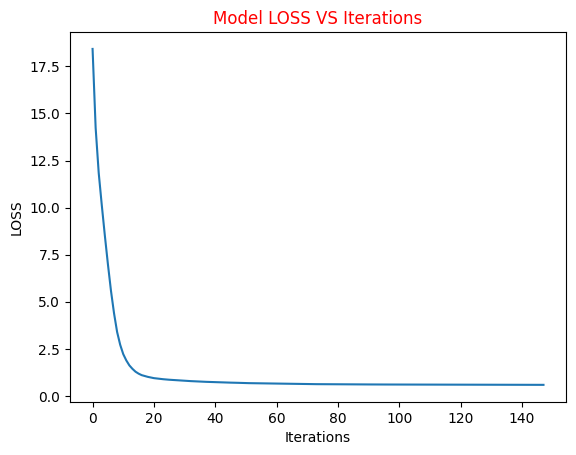

In [13]:
plt.plot(LOSS)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model LOSS VS Iterations', color='red')
plt.show();

In [14]:
ACCURACY= History.history['accuracy']

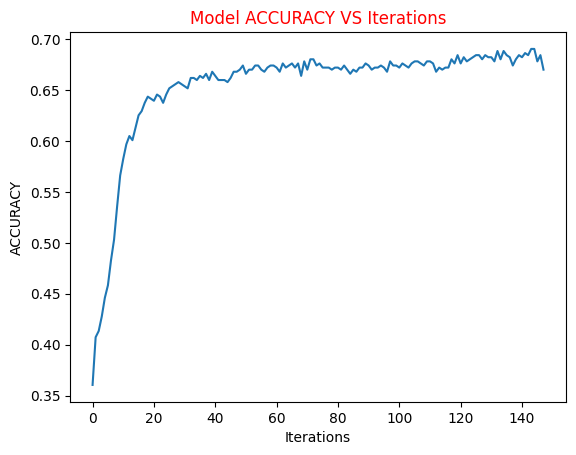

In [15]:
plt.plot(ACCURACY)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model ACCURACY VS Iterations', color='red')
plt.show();

In [16]:
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6938


[0.5863747596740723, 0.6938110589981079]

In [17]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.6818


[0.6425133943557739, 0.6818181872367859]

## `ii` Deep network


In [36]:
random_state = 42
model2= Sequential()
model2.add (Dense(5, activation= 'relu', input_shape= (X_train.shape[1],)))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add (Dense(1, activation= 'sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
 dense_15 (Dense)            (None, 12)                72        
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 230 (920.00 Byte)
Trainable params: 230 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model2.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
History2 = model2.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.3, callbacks= [early_stopping])
History2

Epoch 1/1000
14/14 [==============================] - 1s 18ms/step - loss: 4.4458 - accuracy: 0.4242 - val_loss: 2.5331 - val_accuracy: 0.4649
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 3.1370 - accuracy: 0.4499 - val_loss: 1.8371 - val_accuracy: 0.5514
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.2809 - accuracy: 0.5548 - val_loss: 1.4363 - val_accuracy: 0.5838
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 1.7594 - accuracy: 0.5688 - val_loss: 1.1938 - val_accuracy: 0.5892
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.4263 - accuracy: 0.5781 - val_loss: 1.0218 - val_accuracy: 0.5946
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.1684 - accuracy: 0.5897 - val_loss: 0.9084 - val_accuracy: 0.6054
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.9680 - accuracy: 0.6084 - val_loss: 0.8230 - val_accuracy: 0.6054
Epoch

In [39]:
LOSS2= History2.history['loss']

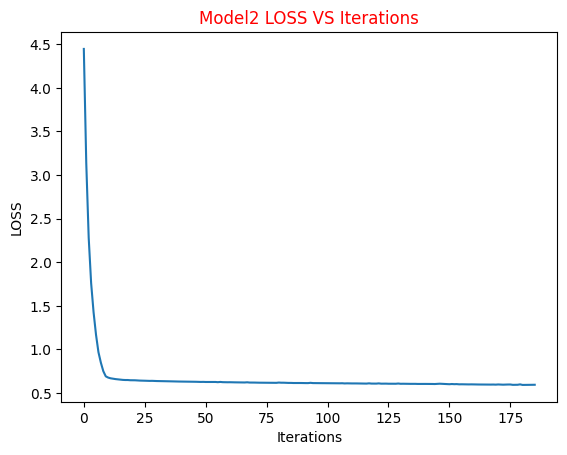

In [40]:
plt.plot(LOSS2)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model2 LOSS VS Iterations', color='red')
plt.show();

In [41]:
ACCURACY2= History2.history['accuracy']

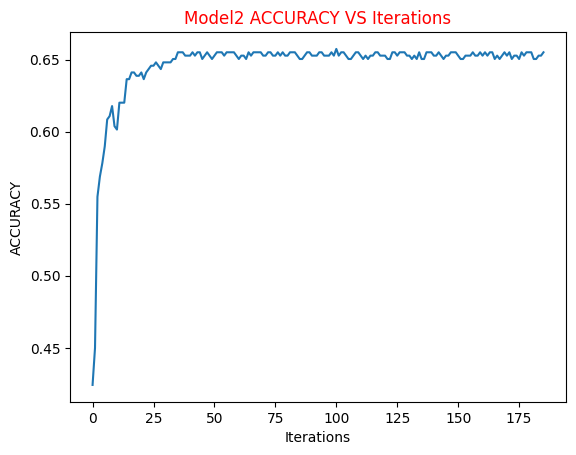

In [42]:
plt.plot(ACCURACY2)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model2 ACCURACY VS Iterations', color='red')
plt.show();

In [43]:
model2.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.6531


[0.5947712063789368, 0.653094470500946]

In [44]:
model2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6429


[0.6326113343238831, 0.6428571343421936]

## `iii` Deeper network


In [53]:
random_state = 42
model3= Sequential()
model3.add (Dense(5, activation= 'relu', input_shape= (X_train.shape[1],)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add (Dense(1, activation= 'sigmoid'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 45        
                                                                 
 dense_24 (Dense)            (None, 32)                192       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 910 (3.55 KB)
Trainable params: 910 (3.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model3.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
early_stopping2 = EarlyStopping (monitor= "loss" , patience= 15, restore_best_weights= True)

In [55]:
History3 = model3.fit(X_train, y_train, epochs=1000, batch_size=32,  validation_split = 0.3, callbacks= [early_stopping2])
History3

Epoch 1/1000
14/14 [==============================] - 1s 19ms/step - loss: 5.8344 - accuracy: 0.4662 - val_loss: 3.1707 - val_accuracy: 0.6324
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.4068 - accuracy: 0.6340 - val_loss: 1.3461 - val_accuracy: 0.5514
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.1260 - accuracy: 0.5385 - val_loss: 1.0874 - val_accuracy: 0.5838
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.8281 - accuracy: 0.5501 - val_loss: 0.7800 - val_accuracy: 0.5351
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.7096 - accuracy: 0.6224 - val_loss: 0.7263 - val_accuracy: 0.5514
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.6480 - val_loss: 0.7011 - val_accuracy: 0.5730
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.6549 - accuracy: 0.6340 - val_loss: 0.6623 - val_accuracy: 0.6324
Epoch

In [56]:
LOSS3= History3.history['loss']

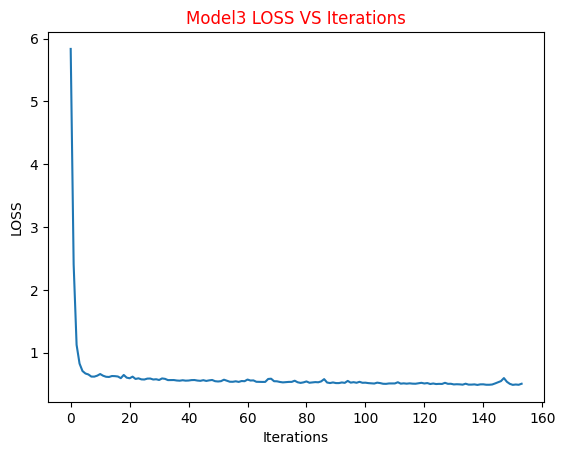

In [57]:
plt.plot(LOSS3)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model3 LOSS VS Iterations', color='red')
plt.show();

In [58]:
ACCURACY3= History3.history['accuracy']

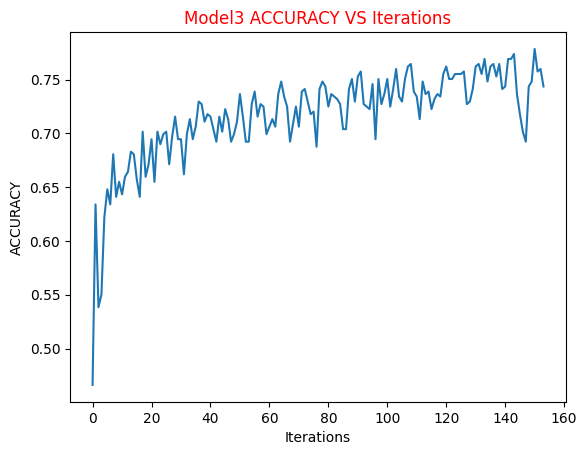

In [59]:
plt.plot(ACCURACY3)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model3 ACCURACY VS Iterations', color='red')
plt.show();

In [60]:
model3.evaluate(X_train, y_train)

20/20 [==============================] - 0s 5ms/step - loss: 0.5209 - accuracy: 0.7459


[0.5208595395088196, 0.7459283471107483]

In [61]:
model3.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6623


[0.6758993268013, 0.6623376607894897]

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$